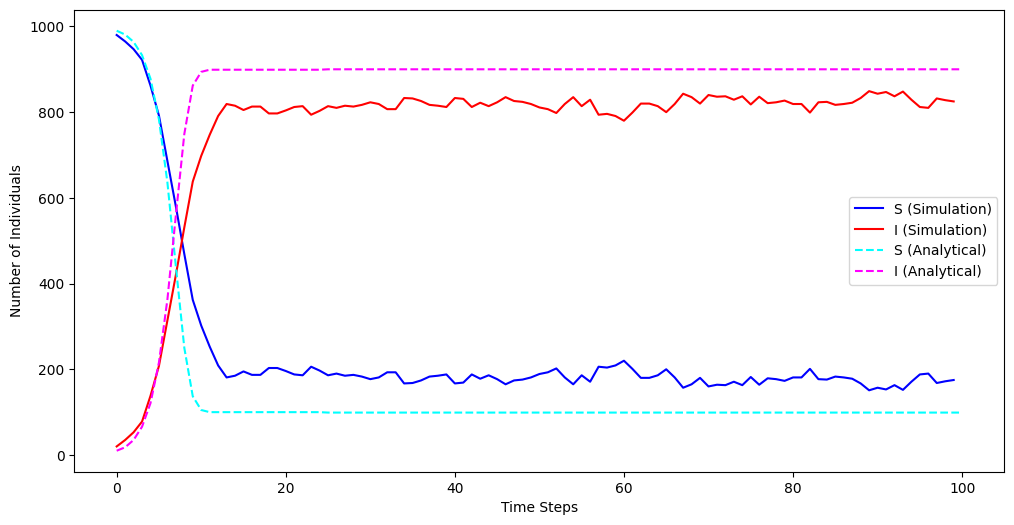

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 1000 
p = 0.005  # Probability of edge creation
beta = 0.2
gamma = 0.1
initial = 10
num_steps = 100

G = nx.erdos_renyi_graph(N, p)

# Simulation of the SIS model
def simulate_sis(G, beta, gamma, initial_infected, num_steps):
    nodes = list(G.nodes())
    infected = set(np.random.choice(nodes, initial_infected, replace=False))
    susceptible = set(nodes) - infected
    
    infected_counts = []
    susceptible_counts = []
    
    for step in range(num_steps):
        new_infected = set()
        new_susceptible = set()
        
        for node in susceptible:
            neighbors = list(G.neighbors(node))
            infected_neighbors = sum(1 for neighbor in neighbors if neighbor in infected)
            if np.random.rand() < 1 - np.exp(-beta * infected_neighbors):
                new_infected.add(node)
        
        for node in infected:
            if np.random.rand() < gamma:
                new_susceptible.add(node)
        
        infected = (infected - new_susceptible) | new_infected
        susceptible = (susceptible - new_infected) | new_susceptible
        
        infected_counts.append(len(infected))
        susceptible_counts.append(len(susceptible))
    
    return susceptible_counts, infected_counts

S_simulation, I_simulation = simulate_sis(G, beta, gamma, initial, num_steps)

# Analytical Approach
def analytical_sis(N, p, beta, gamma, initial_infected_fraction, num_steps):
    k_avg = N * p
    I = initial_infected_fraction
    S = 1 - I
    infected_fractions = [I]
    susceptible_fractions = [S]
    
    for step in range(num_steps):
        new_I = I + beta * k_avg * I * S - gamma * I
        new_S = 1 - new_I
        I = new_I
        S = new_S
        infected_fractions.append(I)
        susceptible_fractions.append(S)
    
    infected_counts = [int(i * N) for i in infected_fractions]
    susceptible_counts = [int(s * N) for s in susceptible_fractions]
    
    return susceptible_counts, infected_counts

initial_infected_fraction = initial / N

S_analytical, I_analytical = analytical_sis(N, p, beta, gamma, initial_infected_fraction, num_steps)

plt.figure(figsize=(12, 6))

plt.plot(S_simulation, label='S (Simulation)', color='blue')
plt.plot(I_simulation, label='I (Simulation)', color='red')
plt.plot(S_analytical, label='S (Analytical)', linestyle='--', color='cyan')
plt.plot(I_analytical, label='I (Analytical)', linestyle='--', color='magenta')

plt.xlabel('Time Steps')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()


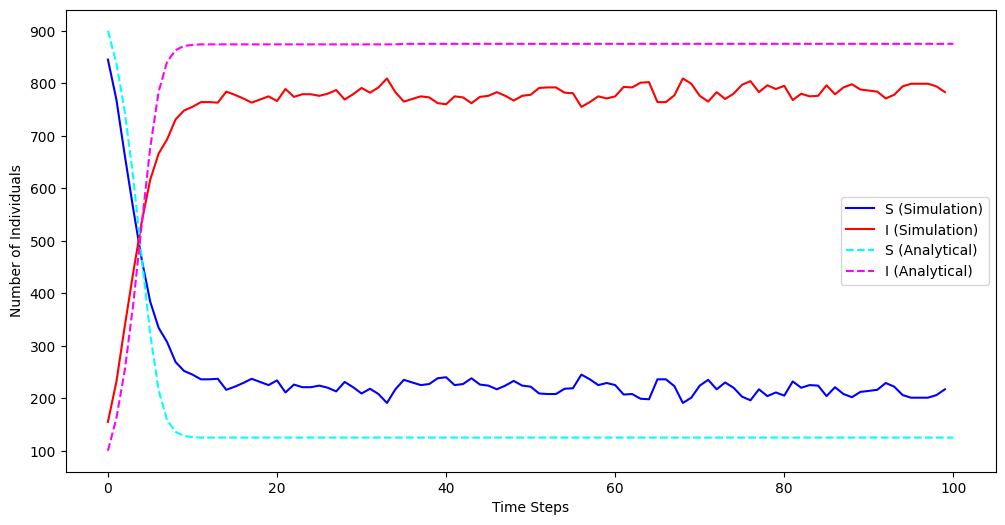

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 1000
m = 2
beta = 0.2
gamma = 0.1
initial = 100

# Generate Barabási-Albert graph
G = nx.barabasi_albert_graph(N, m)

# Simulation of the SIS model
def simulate_sis(G, beta, gamma, initial_infected, num_steps):
    nodes = list(G.nodes())
    infected = set(np.random.choice(nodes, initial_infected, replace=False))
    susceptible = set(nodes) - infected
    
    infected_counts = []
    susceptible_counts = []
    
    for step in range(num_steps):
        new_infected = set()
        new_susceptible = set()
        
        # Infection process
        for node in susceptible:
            neighbors = list(G.neighbors(node))
            infected_neighbors = sum(1 for neighbor in neighbors if neighbor in infected)
            if np.random.rand() < 1 - np.exp(-beta * infected_neighbors):
                new_infected.add(node)
        
        # Recovery process
        for node in infected:
            if np.random.rand() < gamma:
                new_susceptible.add(node)
        
        infected = (infected - new_susceptible) | new_infected
        susceptible = (susceptible - new_infected) | new_susceptible
        
        infected_counts.append(len(infected))
        susceptible_counts.append(len(susceptible))
    
    return susceptible_counts, infected_counts

# Simulate the SIS model
S_simulation, I_simulation = simulate_sis(G, beta, gamma, initial, num_steps)

# Corrected Analytical Approach for BA graph
def analytical_sis_ba(N, m, beta, gamma, initial_infected_fraction, num_steps):
    k_avg = 2 * m  # Average degree in a BA graph
    I = initial_infected_fraction
    S = 1 - I
    infected_fractions = [I]
    susceptible_fractions = [S]
    
    for step in range(num_steps):
        new_I = I + beta * k_avg * I * S - gamma * I
        new_S = 1 - new_I
        I = new_I
        S = new_S
        infected_fractions.append(I)
        susceptible_fractions.append(S)
    
    infected_counts = [int(i * N) for i in infected_fractions]
    susceptible_counts = [int(s * N) for s in susceptible_fractions]
    
    return susceptible_counts, infected_counts

# Parameters
initial_infected_fraction = initial / N

# Analytical solution for BA graph
S_analytical, I_analytical = analytical_sis_ba(N, m, beta, gamma, initial_infected_fraction, num_steps)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(S_simulation, label='S (Simulation)', color='blue')
plt.plot(I_simulation, label='I (Simulation)', color='red')
plt.plot(S_analytical, label='S (Analytical)', linestyle='--', color='cyan')
plt.plot(I_analytical, label='I (Analytical)', linestyle='--', color='magenta')

plt.xlabel('Time Steps')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()


Classical Voting

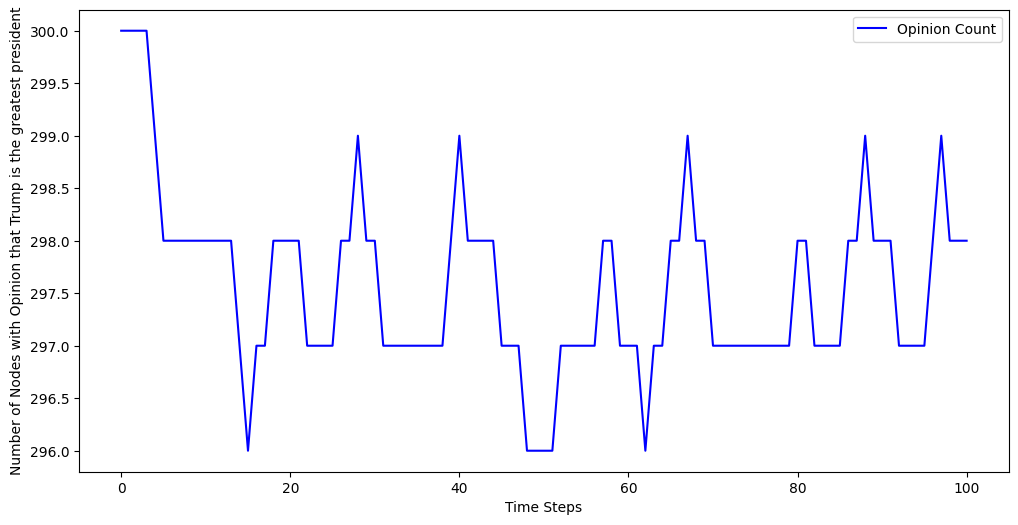

In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
seed = 42
np.random.seed(seed)
random.seed(seed)

N = 1000  
m = 3   
initial_fraction = 0.3  # Initial fraction of nodes with opinion A (Trump will be the greatest president)
num_steps = 100

G = nx.barabasi_albert_graph(N, m, seed=seed)

opinions = np.zeros(N, dtype=int)
initial_infected = int(initial_fraction * N)
opinions[np.random.choice(N, initial_infected, replace=False)] = 1

def simulate_voter(G, opinions, num_steps):
    opinion_counts = [np.sum(opinions)]
    
    for step in range(num_steps):
        node = np.random.choice(G.nodes)
        neighbors = list(G.neighbors(node))
        if neighbors:
            chosen_neighbor = np.random.choice(neighbors)
            opinions[node] = opinions[chosen_neighbor]
        
        opinion_counts.append(np.sum(opinions))
    
    return opinion_counts

opinion_counts = simulate_voter(G, opinions, num_steps)

plt.figure(figsize=(12, 6))

plt.plot(opinion_counts, label='Opinion Count', color='blue')

plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes with Opinion that Trump is the greatest president')
plt.legend()
plt.show()


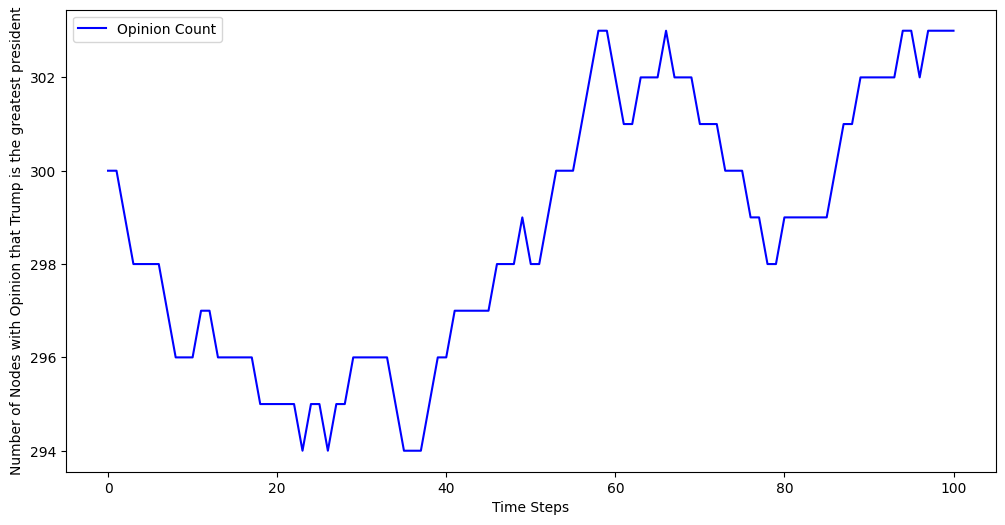

In [54]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

seed = 42
np.random.seed(seed)
random.seed(seed)

N = 1000  
m = 3   
initial_fraction = 0.3  # Initial fraction of nodes with opinion A (Trump will be the greatest president)
num_steps = 100
propaganda_strength = 0.05  # Probability of adopting opinion A due to Trump's propaganda

G = nx.barabasi_albert_graph(N, m, seed=seed)

opinions = np.zeros(N, dtype=int)
initial_infected = int(initial_fraction * N)
opinions[np.random.choice(N, initial_infected, replace=False)] = 1

def simulate_voter_propoganda(G, opinions, propaganda_strength, num_steps):
    opinion_counts = [np.sum(opinions)]
    
    for step in range(num_steps):
        node = np.random.choice(G.nodes)
        
        # Propaganda effect
        if np.random.rand() < propaganda_strength:
            opinions[node] = 1  
        else:
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = np.random.choice(neighbors)
                opinions[node] = opinions[chosen_neighbor]
        
        opinion_counts.append(np.sum(opinions))
    
    return opinion_counts

opinion_counts = simulate_voter_propoganda(G, opinions, propaganda_strength, num_steps)

plt.figure(figsize=(12, 6))

plt.plot(opinion_counts, label='Opinion Count', color='blue')

plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes with Opinion that Trump is the greatest president')
plt.legend()
plt.show()


with ideology + propoganda

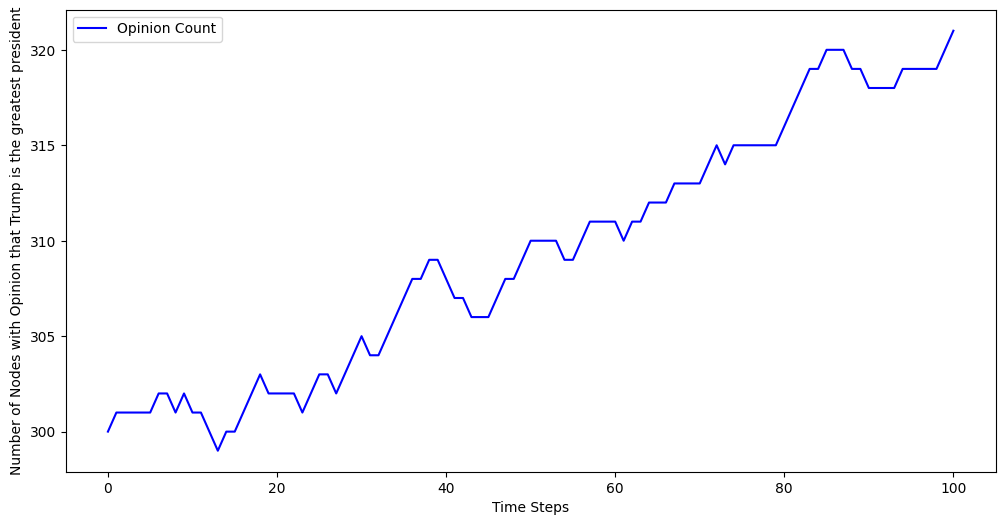

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 1000  
m = 3   
initial_fraction = 0.3  # Initial fraction of nodes with opinion A (Trump will be the greatest president)
num_steps = 100
propaganda_strength = 0.05  # Probability of adopting opinion A due to Elon Musk campaign in Penselvelia 
ideology_strength = 0.2  # Strength of the ideological bias

G = nx.barabasi_albert_graph(N, m)

opinions = np.zeros(N, dtype=int)
initial_infected = int(initial_fraction * N)
opinions[np.random.choice(N, initial_infected, replace=False)] = 1

ideologies = np.random.uniform(-ideology_strength, ideology_strength, N)

# Simulation of the modified voter model
def simulate_voter(G, opinions, ideologies, propaganda_strength, num_steps):
    opinion_counts = [np.sum(opinions)]
    
    for step in range(num_steps):
        node = np.random.choice(G.nodes)
        
        # Propaganda effect
        if np.random.rand() < propaganda_strength:
            opinions[node] = 1 
        else:
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = np.random.choice(neighbors)
                neighbor_opinion = opinions[chosen_neighbor]
                
                # Ideology effect
                if neighbor_opinion == 1:
                    if np.random.rand() < (0.5 + ideologies[node]):
                        opinions[node] = 1
                    else:
                        opinions[node] = 0
                else:
                    if np.random.rand() < (0.5 - ideologies[node]):
                        opinions[node] = 0
                    else:
                        opinions[node] = 1
        
        opinion_counts.append(np.sum(opinions))
    
    return opinion_counts

opinion_counts = simulate_voter(G, opinions, ideologies, propaganda_strength, num_steps)

plt.figure(figsize=(12, 6))

plt.plot(opinion_counts, label='Opinion Count', color='blue')

plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes with Opinion that Trump is the greatest president')
plt.legend()
plt.show()
